## Needed Libs
    For this lecture I started to develop a library.
    with using this lib all ML lecture can be coverted.
    with every assignment lib will grove

In [1]:
import my_eMeL.my_eMeL as my_eMeL
import my_eMeL.data_loader as data_loader

### Reading data from a file
    Using the lib a data file can read very easly

In [2]:
# import some known data
iris_data_df, iris_label_df = data_loader.load_known_txt( file_path    = './iris_data.txt',
                                                          delimiter    = ','   ,
                                                          data_column_asList  = [0,3] ,
                                                          label_column =  4     )      

#### Take a look to data

In [3]:
from IPython.display import display_html 

df1_styler = iris_data_df[:10].style.set_table_attributes("style='display:inline'").set_caption('Data of Iris')
df2_styler = iris_label_df[:10].style.set_table_attributes("style='display:inline'").set_caption('Label of Iris')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,col0,col3
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
5,5.4,0.4
6,4.6,0.3
7,5.0,0.2
8,4.4,0.2
9,4.9,0.1


### Splitting the data into Train and Test.
    Not randomly - (random function will implement for lib)
    Assignmnet wants first 30 row as Train others as Test Data

In [4]:
train_data_df, train_label_df,\
 test_data_df,  test_label_df = my_eMeL.split_Train_and_Test (  data  = iris_data_df  ,
                                                                label = iris_label_df ,
                                                                label_col_name = 'Labels',
                                                                uniq_lables = list(iris_label_df.Labels.unique()),
                                                                first_n_number_train = 30)        


df1_styler = train_data_df[:10].style.set_table_attributes("style='display:inline'").set_caption('Train Data of Iris')
df2_styler = train_label_df[:10].style.set_table_attributes("style='display:inline'").set_caption('Train Label of Iris')
df3_styler = test_data_df[:10].style.set_table_attributes("style='display:inline'").set_caption('Test Data of Iris')
df4_styler = test_label_df[:10].style.set_table_attributes("style='display:inline'").set_caption('Test Label of Iris')

display_html(df1_styler._repr_html_()\
             +df2_styler._repr_html_()\
             +df3_styler._repr_html_()\
             +df4_styler._repr_html_(), raw=True)

,col0,col3
100,6.3,2.5
101,5.8,1.9
102,7.1,2.1
103,6.3,1.8
104,6.5,2.2
105,7.6,2.1
106,4.9,1.7
107,7.3,1.8
108,6.7,1.8
109,7.2,2.5


---

## KNeighborsClassifier of my_eMeL
    Lib has some custom function for testing and accuracy table
    According to the assignment. pred-desired k numbers and distance metrics selected and with iterating the values
    wanted table will created by lib
    

In [5]:
table = my_eMeL.create_AccuracyTable( index   = 'K-Value',
                                    columns = ['Accuracy (%)','Error Count'] )

for distance_metric_for_clf in ['Euclidean','Manhattan','Cosine']:
    table_header_column_name = str(distance_metric_for_clf + ' Distance' )
    for k in [1,3,5,7,9,11,15]:
        
        clf = my_eMeL.KNeighborsClassifier( k_number        = k  ,
                                          distance_metric = distance_metric_for_clf   )
        clf.fit(  data  = train_data_df ,
                  label = train_label_df,
                  label_col_name = 'Labels')
        
        predicted = clf.predict_test(  test_data_df  = test_data_df ,
                      test_label_df = test_label_df  ) 
        
        
        accuracy, error_count = clf.get_accuracy_values()                     
        
        
        table.add_subTable_row( header_name = table_header_column_name,
                                data        = [accuracy, error_count],
                                index_name  = 'K = %s'%(k) )

table.get_table()


my_eMeL/DistanceFunctions.py:23: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(num/denom) * tmp


Cosine Distance             Euclidean Distance              \
           Accuracy (%) Error Count       Accuracy (%) Error Count   
K-Value                                                              
K = 1             88.33        7/60              91.67        5/60   
K = 3             91.67        5/60              96.67        2/60   
K = 5             88.33        7/60              96.67        2/60   
K = 7             88.33        7/60              96.67        2/60   
K = 9             91.67        5/60              96.67        2/60   
K = 11            91.67        5/60              96.67        2/60   
K = 15            88.33        7/60              95.00        3/60   

        Manhattan Distance              
              Accuracy (%) Error Count  
K-Value                                 
K = 1                90.00        6/60  
K = 3                96.67        2/60  
K = 5                96.67        2/60  
K = 7                96.67        2/60  
K = 9                96.67        2/60  
K = 11               95.00        3/60  
K = 15               95.00        3/60

### Desired Decision Boundries Graphs 


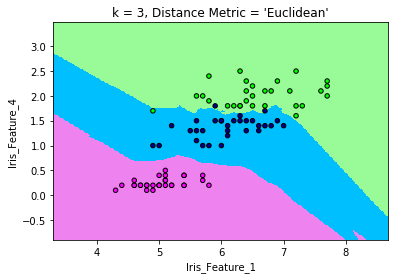

In [6]:
k = 3
distance_metric_for_clf = 'Euclidean'
my_eMeL.draw_decisionBoundries (train_data_df, train_label_df, 'Labels', k, distance_metric_for_clf , h = 0.02)

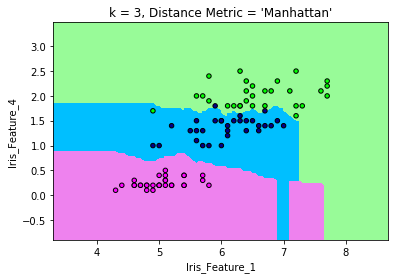

In [7]:
k = 3
distance_metric_for_clf = 'Manhattan'
my_eMeL.draw_decisionBoundries (train_data_df, train_label_df, 'Labels', k, distance_metric_for_clf , h = 0.02)

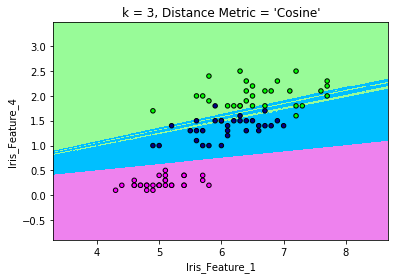

In [8]:
k = 3
distance_metric_for_clf = 'Cosine'
my_eMeL.draw_decisionBoundries (train_data_df, train_label_df, 'Labels', k, distance_metric_for_clf , h = 0.02)

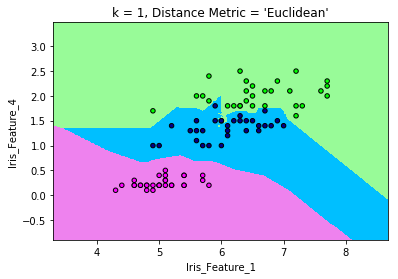

In [9]:
k = 1
distance_metric_for_clf = 'Euclidean'
my_eMeL.draw_decisionBoundries (train_data_df, train_label_df, 'Labels', k, distance_metric_for_clf , h = 0.02)